## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the datasets

In [ ]:
weather_data = pd.read_csv("/content/drive/MyDrive/Flood prediction modelling/MERGEDlagos_weeather_data_2002_to_2024.csv", encoding='latin1')

flood_events = pd.read_excel("/content/drive/MyDrive/Flood prediction modelling/Flood event.xlsx")

In [ ]:
weather_data.shape

(8676, 9)

In [ ]:
weather_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [ ]:
flood_events.head()

,Year,Month,Event,Impact Areas
0,2002,July,Flood,Lagos Island
1,2004,June,Flood,Lagos Island
2,2005,July,Flood,"Lagos Island, Victorian Island"
3,2007,August,Flood,Kosofe
4,2008,October,Flood,Lagos Island


## Dropping unused columns


In [ ]:
columns_to_drop = [
    'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description',
    'dew', 'icon', 'tempmax', 'tempmin', 'humidity', 'snow', 'snowdepth',
    'windgust', 'winddir', 'windspeed', 'feelslikemax', 'feelslikemin', 'feelslike',
    'stations', 'windspeedmax', 'windspeedmin'
]

weather_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
weather_data.head()

,name,datetime,temp,precip,precipprob,precipcover,preciptype,sealevelpressure
0,Lagos,2002-01-01,27.2,0.0,0.0,0.0,NaN,1010.9
1,Lagos,2002-01-02,29.0,0.0,0.0,0.0,NaN,1011.2
2,Lagos,2002-01-03,29.1,0.0,0.0,0.0,NaN,1011.7
3,Lagos,2002-01-04,33.1,0.0,0.0,0.0,NaN,1010.2
4,Lagos,2002-01-05,28.3,0.0,0.0,0.0,NaN,1010.0


In [ ]:
# Checking for missing values
print(weather_data.isnull().sum())
print(flood_events.isnull().sum())


name                   0
datetime               0
temp                 823
precip               823
precipprob           823
precipcover            0
preciptype          4940
sealevelpressure    1012
dtype: int64
Year            0
Month           0
Event           0
Impact Areas    0
dtype: int64


## Handling missing Values

In [ ]:
# Dropping columns with a high percentage of missing values
threshold = 0.5
weather_data = weather_data.loc[:, weather_data.isnull().mean() < threshold]

# filling the remaining missing values
weather_data['temp'].fillna(weather_data['temp'].mean(), inplace=True)
weather_data['precip'].fillna(weather_data['precip'].mean(), inplace=True)
weather_data['precipprob'].fillna(weather_data['precipprob'].mean(), inplace=True)
weather_data['sealevelpressure'].fillna(weather_data['sealevelpressure'].mean(), inplace=True)


<ipython-input-97-b243310f7379>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['temp'].fillna(weather_data['temp'].mean(), inplace=True)
<ipython-input-97-b243310f7379>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['precip'].fillna(weather_data['precip'].mean(), inplace=True)
<ipython-input-97-b243310f7379>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['precipprob'].fillna(weather_data['pr

In [ ]:
# Getting summary statistics
print(weather_data.describe())
print(flood_events.describe())

                            datetime         temp       precip   precipprob  \
count                           7125  8676.000000  8676.000000  8676.000000   
mean   2012-06-11 23:08:27.789473536    27.433949     5.034344    43.282822   
min              2002-01-01 00:00:00    21.400000     0.000000     0.000000   
25%              2006-11-17 00:00:00    26.300000     0.000000     0.000000   
50%              2011-10-03 00:00:00    27.433949     0.000000     0.000000   
75%              2017-08-18 00:00:00    28.500000     5.000000   100.000000   
max              2024-07-03 00:00:00    34.600000   299.000000   100.000000   
std                              NaN     1.523924    17.181196    47.140930   

       precipcover  sealevelpressure         Year  
count  8676.000000       8676.000000  7125.000000  
mean      4.815538       1012.014770  2011.952982  
min       0.000000       1005.900000  2002.000000  
25%       0.000000       1010.900000  2006.000000  
50%       0.000000       101

## Data Preprocessing

In [ ]:
# Convert 'datetime' column to datetime format with specified format
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], format='%Y-%m-%d', errors='coerce')

# Extracting year from date
weather_data['Year'] = weather_data['datetime'].dt.year

# Grouping
yearly_precipitation = weather_data.groupby('Year')['precip'].sum()


In [ ]:
weather_data.head()

,name,datetime,temp,precip,precipprob,precipcover,preciptype,sealevelpressure,Year
0,Lagos,2002-01-01,27.2,0.0,0.0,0.0,NaN,1010.9,2002.0
1,Lagos,2002-01-02,29.0,0.0,0.0,0.0,NaN,1011.2,2002.0
2,Lagos,2002-01-03,29.1,0.0,0.0,0.0,NaN,1011.7,2002.0
3,Lagos,2002-01-04,33.1,0.0,0.0,0.0,NaN,1010.2,2002.0
4,Lagos,2002-01-05,28.3,0.0,0.0,0.0,NaN,1010.0,2002.0


## importing merged dataset

In [ ]:
merged = pd.read_csv("/content/drive/MyDrive/Flood prediction modelling/m2.csv", encoding='latin1')

In [ ]:
merged.head()

,name,Year,Month,Day,precip,precipprob,precipcover,preciptype,sealevelpressure,Event
0,Lagos,2002,1,1.0,0.0,0.0,0.0,NaN,1010.9,No floods
1,Lagos,2002,1,2.0,0.0,0.0,0.0,NaN,1011.2,No floods
2,Lagos,2002,1,3.0,0.0,0.0,0.0,NaN,1011.7,No floods
3,Lagos,2002,1,4.0,0.0,0.0,0.0,NaN,1010.2,No floods
4,Lagos,2002,1,5.0,0.0,0.0,0.0,NaN,1010.0,No floods


In [ ]:
merged.isnull().sum()

name                   0
Year                   0
Month                  0
Day                 1551
precip               823
precipprob           823
precipcover            0
preciptype          4940
sealevelpressure    1012
Event                  0
dtype: int64

In [ ]:
# filling the remaining missing values
merged['Day'].fillna(merged['Day'].mean(), inplace=True)
merged['precip'].fillna(merged['precip'].mean(), inplace=True)
merged['precipprob'].fillna(merged['precipprob'].mean(), inplace=True)
merged['preciptype'].fillna(merged['preciptype'].mode()[0], inplace=True)
merged['sealevelpressure'].fillna(merged['sealevelpressure'].mean(), inplace=True)


# Check the DataFrame after handling missing values
print("DataFrame shape after handling missing values:", merged.shape)
print(merged.head())

DataFrame shape after handling missing values: (8676, 10)
    name  Year  Month  Day  precip  precipprob  precipcover preciptype  \
0  Lagos  2002      1  1.0     0.0         0.0          0.0       rain   
1  Lagos  2002      1  2.0     0.0         0.0          0.0       rain   
2  Lagos  2002      1  3.0     0.0         0.0          0.0       rain   
3  Lagos  2002      1  4.0     0.0         0.0          0.0       rain   
4  Lagos  2002      1  5.0     0.0         0.0          0.0       rain   

   sealevelpressure      Event  
0            1010.9  No floods  
1            1011.2  No floods  
2            1011.7  No floods  
3            1010.2  No floods  
4            1010.0  No floods  


In [ ]:
merged.head()

,name,Year,Month,Day,precip,precipprob,precipcover,preciptype,sealevelpressure,Event
0,Lagos,2002,1,1.0,0.0,0.0,0.0,rain,1010.9,No floods
1,Lagos,2002,1,2.0,0.0,0.0,0.0,rain,1011.2,No floods
2,Lagos,2002,1,3.0,0.0,0.0,0.0,rain,1011.7,No floods
3,Lagos,2002,1,4.0,0.0,0.0,0.0,rain,1010.2,No floods
4,Lagos,2002,1,5.0,0.0,0.0,0.0,rain,1010.0,No floods


In [ ]:
# Assuming 'Year', 'Month', 'Day' are columns in your DataFrame 'merged'
# Specify the format explicitly and handle errors
merged['Date'] = pd.to_datetime(merged[['Year', 'Month', 'Day']], format='%Y-%m-%d', errors='coerce')

# Check for rows where conversion failed
invalid_dates = merged['Date'].isnull()
if invalid_dates.any():
    print(f"Invalid date rows: {merged[invalid_dates]}")

# Set index if conversion was successful
merged.set_index('Date', inplace=True)


Invalid date rows:           name  Year  Month  Day  precip  precipprob  precipcover preciptype  \
3588245  Lagos  3023      5   15     0.0         0.0         0.00       rain   
3588328  Lagos  3023      8   15     0.3       100.0         4.17       rain   

         sealevelpressure      Event DaysUntilFlood_x DaysUntilFlood_y Date  
3588245            1012.9  No floods              NaT              NaT  NaT  
3588328            1015.9  No floods              NaT              NaT  NaT  


In [ ]:
# Convert 'Year', 'Month', 'Day' to datetime, handling errors with 'coerce'
merged['Date'] = pd.to_datetime(merged[['Year', 'Month', 'Day']], errors='coerce')

# Check for rows where conversion failed
invalid_dates = merged['Date'].isnull()
if invalid_dates.any():
    print(f"Invalid date rows:\n{merged[invalid_dates]}")

# Set index if conversion was successful
merged.set_index('Date', inplace=True)
print(merged)

Invalid date rows:
       name  Year  Month  Day  precip  precipprob  precipcover preciptype  \
Date                                                                        
NaT   Lagos  3023      5   15     0.0         0.0         0.00       rain   
NaT   Lagos  3023      8   15     0.3       100.0         4.17       rain   

      sealevelpressure      Event DaysUntilFlood_x DaysUntilFlood_y Date  
Date                                                                      
NaT             1012.9  No floods              NaT              NaT  NaT  
NaT             1015.9  No floods              NaT              NaT  NaT  
             name  Year  Month  Day  precip  precipprob  precipcover  \
Date                                                                   
2002-01-01  Lagos  2002      1    1     0.0         0.0         0.00   
2002-01-02  Lagos  2002      1    2     0.0         0.0         0.00   
2002-01-03  Lagos  2002      1    3     0.0         0.0         0.00   
2002-01-04  

In [ ]:
# Select relevant columns
columns_of_interest = ['precip', 'precipprob', 'precipcover', 'sealevelpressure', 'Event']
data = merged[columns_of_interest]

## Exploratory Data Analysis

### precipitation by year

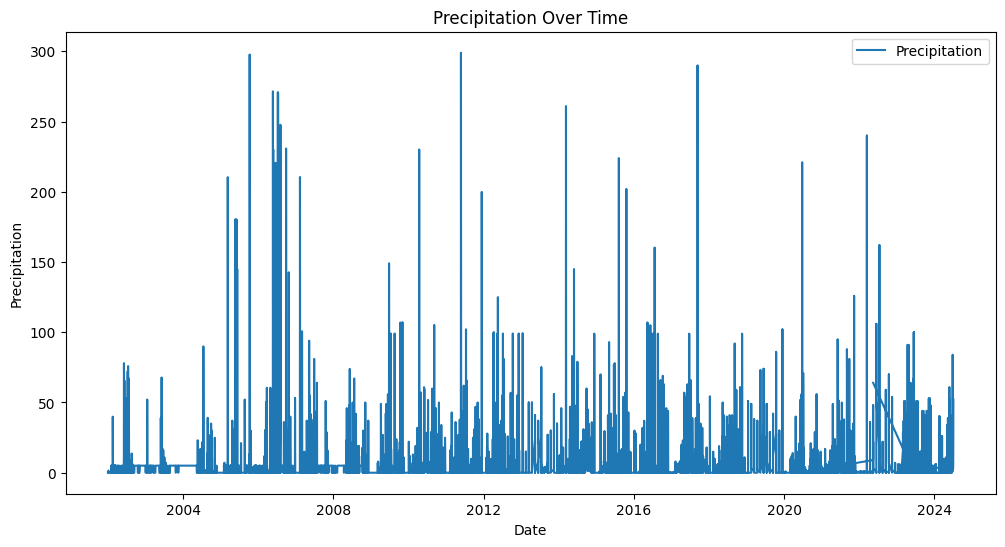

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['precip'], label='Precipitation')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

### Sea level pressure by year

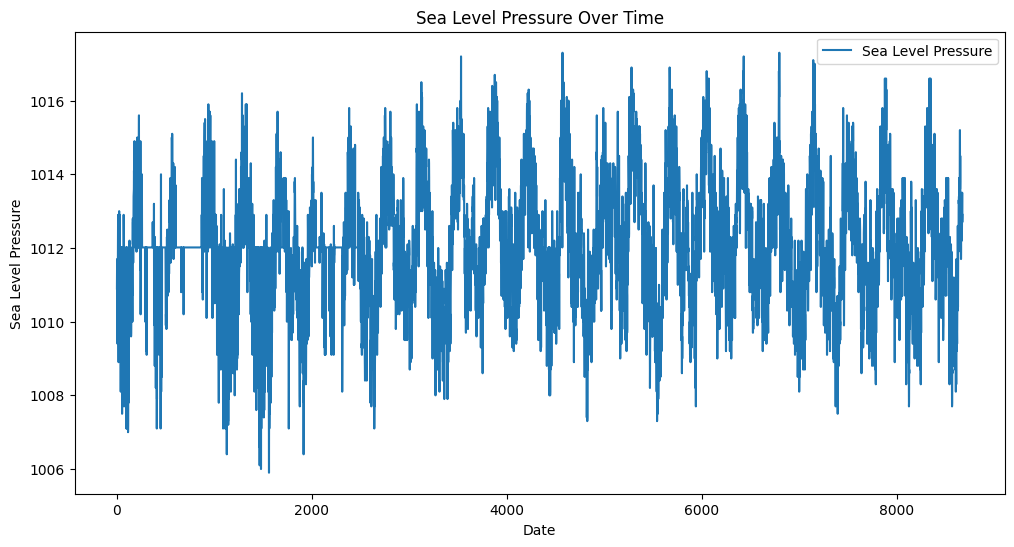

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged['sealevelpressure'], label='Sea Level Pressure')
plt.title('Sea Level Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Sea Level Pressure')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
merged['precip'].fillna(merged['precip'].mean(), inplace=True)

# Example: ADF test for stationarity
result = adfuller(merged['precip'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.76005068125877
p-value: 8.180343976697636e-24


with ADF statistic of -12.760 and a p-value of 8.18e-24,reject the null hypothesis. Therefore, the time series is stationary.

## Preparing data for modelling

In [ ]:
# Creating X and Y variables
X = merged[['Year', 'Month', 'Day', 'precip', 'precipprob', 'precipcover', 'sealevelpressure']]
y = merged['DaysUntilFlood']

print(y)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8671   NaN
8672   NaN
8673   NaN
8674   NaN
8675   NaN
Name: DaysUntilFlood, Length: 8676, dtype: float64


In [ ]:
# Splitting the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

      Year  Month  Day     precip  precipprob  precipcover  sealevelpressure
2614  2009      2   27   0.000000    0.000000         0.00        1009.60000
7194  2021      9   12   0.000000    0.000000         0.00        1013.70000
1039  2004     11    5  24.900000  100.000000         4.17        1011.40000
8295  2023      6   19  19.000000  100.000000         4.17        1013.60000
3458  2011      6   21   0.800000  100.000000         4.17        1013.40000
...    ...    ...  ...        ...         ...          ...               ...
5734  2017      9   13   0.000000    0.000000         0.00        1014.90000
5191  2016      3   19   0.000000    0.000000         0.00        1012.20000
5390  2016     10    4   0.000000    0.000000         0.00        1012.60000
860   2004      5   10   5.034344   43.282822         0.00        1012.01477
7270  2021     11   27   0.200000  100.000000         8.33        1010.80000

[6940 rows x 7 columns]


## Model development

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['precip'], order=(1, 1, 1))
fit_model = model.fit()

# Print model summary
print(fit_model.summary())



                               SARIMAX Results                                
Dep. Variable:                 precip   No. Observations:                 8676
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36945.133
Date:                Sun, 07 Jul 2024   AIC                          73896.266
Time:                        14:04:10   BIC                          73917.470
Sample:                             0   HQIC                         73903.494
                               - 8676                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0259      0.006      4.142      0.000       0.014       0.038
ma.L1         -0.9757      0.002   -645.542      0.000      -0.979      -0.973
sigma2       292.7709      0.648    451.851      0.0

In [ ]:
## Forecasting and calculating RMSE
forecast = fit_model.forecast(steps=1)
print('Next predicted flood occurrence:', forecast)


Next predicted flood occurrence: 8676    11.381098
dtype: float64


## Predictions

In [ ]:
# Forecasting future flood dates
n_steps = 12
future_forecast = fit_model.forecast(steps=n_steps)
print('Future flood predictions:', future_forecast)


Future flood predictions: 8676    11.381098
8677    10.324976
8678    10.297583
8679    10.296873
8680    10.296855
8681    10.296854
8682    10.296854
8683    10.296854
8684    10.296854
8685    10.296854
8686    10.296854
8687    10.296854
Name: predicted_mean, dtype: float64


## Visualizing the ARIMA Model

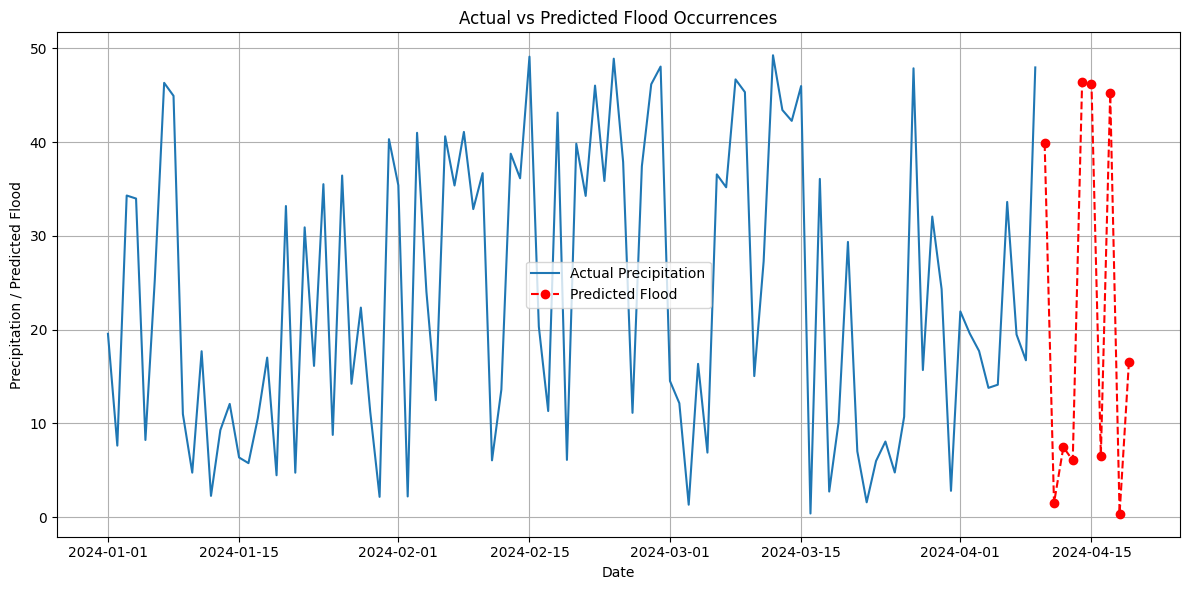

In [ ]:
# Ensure 'data' contains your original dataset and 'future_forecast' is your predicted values
# Example assuming 'data' and 'future_forecast' are properly defined

# Example data creation (replace with your actual dataset)
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'precip': np.random.rand(100) * 50
})

# Convert 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Plotting actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['precip'], label='Actual Precipitation')  # Plotting actual data

# Example for future forecast plot
next_date = data['Date'].max() + pd.DateOffset(days=1)
future_dates = pd.date_range(start=next_date, periods=10, freq='D')
future_forecast = pd.Series(np.random.rand(10) * 50, index=future_dates)
plt.plot(future_dates, future_forecast, color='red', marker='o', linestyle='dashed', label='Predicted Flood')

plt.title('Actual vs Predicted Flood Occurrences')
plt.xlabel('Date')
plt.ylabel('Precipitation / Predicted Flood')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

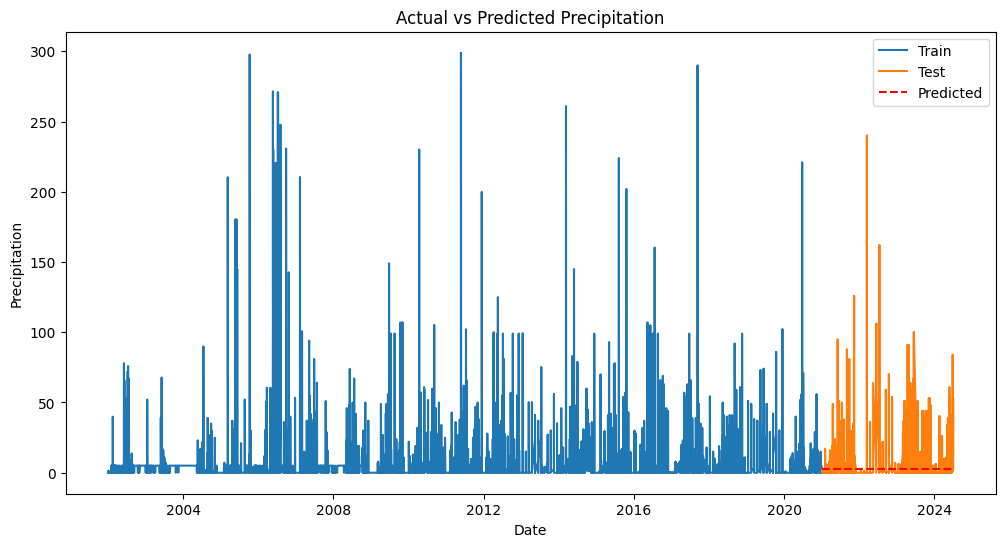

Root Mean Squared Error (RMSE) for future predictions: 14.408747510513376


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data (assuming 'merged' DataFrame is already loaded and preprocessed)
# merged = pd.read_csv('your_data.csv')  # Uncomment and adjust if necessary

# Create datetime index
merged['Date'] = pd.to_datetime(merged[['Year', 'Month', 'Day']])
merged.set_index('Date', inplace=True)

# Define the target variable
y = merged['precip']

# Splitting the dataset
train_size = int(len(merged) * 0.8)
train, test = merged[:train_size], merged[train_size:]

# Instantiate and fit the ARIMA model
p, d, q = 1, 1, 1  # Example parameters; adjust based on your AIC/BIC results
model = ARIMA(train['precip'], order=(p, d, q))
fit_model = model.fit()

# Making predictions
n_steps = len(test)
predictions = fit_model.forecast(steps=n_steps)

# Ensure predictions align with test indices
predictions.index = test.index[:len(predictions)]

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['precip'], label='Train')
plt.plot(test.index, test['precip'], label='Test')
plt.plot(predictions.index, predictions, color='red', linestyle='dashed', label='Predicted')
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

# Model Evaluation
# Calculate RMSE for the predictions
rmse = mean_squared_error(test['precip'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) for future predictions: {rmse}")


## Model Evaluation

In [ ]:
# Calculate RMSE for the predictions
rmse = mean_squared_error(test['precip'], predictions, squared=False)
print(f"Root Mean Squared Error (RMSE) for future predictions: {rmse}")

Root Mean Squared Error (RMSE) for future predictions: 14.408747510513376
